In [1]:
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
%matplotlib inline

### Based on 59.2M tracks yielding 9 ppm precision

In [2]:
n_tracks_r1 = 59.2e6
prec_r1 = 9 # ppm 
raw_e_BNL_r1 = 2 # x2 BNL 
n_tracks_per_BNL = n_tracks_r1/raw_e_BNL_r1
print("Collecting", n_tracks_per_BNL, "tracks per BNL worth of e+")

### For Run-1 to Run-5 based on raw e+ vs. BNL

In [3]:
runs = (1, 2, 3, 4, 5)
runs_BNL = (2,  4.2, 7.6, 15.0, 21.0)

### Assume scaling is the same as for Run-1

In [6]:
tracks = np.array(runs_BNL) * n_tracks_per_BNL
print(tracks)

[5.9200e+07 1.2432e+08 2.2496e+08 4.4400e+08 6.2160e+08]


### Convert from N projected to precision
$$ \frac{\delta R_1}{\sqrt{N_2}} = \frac{\delta R_2}{\sqrt{N_1}} $$

In [7]:
prec = np.sqrt(n_tracks_r1) * prec_r1/np.sqrt(tracks)
prec_2 = np.sqrt(n_tracks_r1) * prec_r1/np.sqrt(tracks*2)
prec_5 = np.sqrt(n_tracks_r1) * prec_r1/np.sqrt(tracks*5)

### Now for the secondary axis, estimate the end points (y-axis limits); How many tracks we need for 10 ppm and 0.1 ppm

In [53]:
prec_min = 0.1
prec_max= 0.54
n_min = (n_tracks_r1 * prec_r1**2 / prec_min**2)
n_max = (n_tracks_r1 * prec_r1**2 / prec_max**2)
print("Limits for the secondary axis x10^10", n_min, n_max*1e-9)

Limits for the secondary axis x10^10 479519999999.9999 16.444444444444443


No plot style specified, returning a nicely formatted axis only: use it e.g. 'ax.plot()'


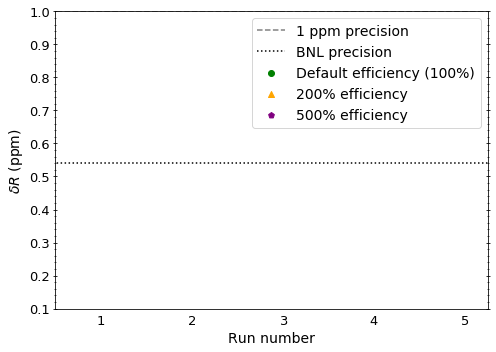

In [48]:
fig, ax = cu.plot(None, None);
ax.scatter(runs, prec, c="g", marker="o", label="Default efficiency (100%)")
ax.scatter(runs, prec_2, c="orange", marker="^", label="200% efficiency")
ax.scatter(runs, prec_5, c="purple", marker="p", label="500% efficiency")

# only int ticks on x-axis
plt.xticks(runs)
ax.set_xlim(0.5, 5.25)
ax.set_xlabel("Run number")
ax.tick_params(axis='x', which='both', bottom=False, top=False, direction='inout')

#now set exact limits and allow secondary axis
ax.set_ylim(prec_min, prec_max)
ax.set_ylabel(r"$\delta R$ (ppm)")

#Add secondary y-axis
# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax2.set_ylim(1.4e10, 47952000.0)
# ax2.set_ylabel(r'Number of tracks', fontsize=13)


# Plot the BNL and 1ppm lines
ax.plot( [-0.1, 6], [1, 1], c="gray", ls="--", label="1 ppm precision")
ax.plot( [-0.1, 6], [0.54, 0.54], label="BNL precision", c="black", ls=":")

ax.legend(fontsize=14)
fig.tight_layout()
plt.savefig("../fig/money.png", dpi=200)

# 

No plot style specified, returning a nicely formatted axis only: use it e.g. 'ax.plot()'


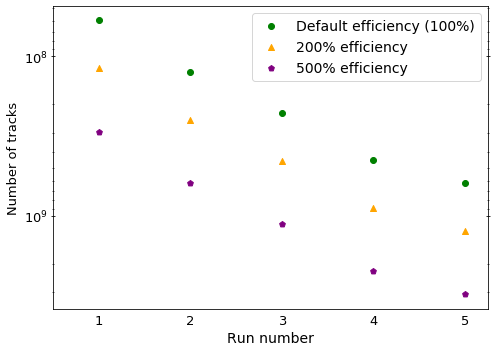

In [46]:
fig, ax = cu.plot(None, None);
ax.scatter(runs, tracks, c="g", marker="o", label="Default efficiency (100%)")
ax.scatter(runs, tracks*2, c="orange", marker="^", label="200% efficiency")
ax.scatter(runs, tracks*5, c="purple", marker="p", label="500% efficiency")

# only int ticks on x-axis
plt.xticks(runs)
ax.set_xlim(0.5, 5.25)
ax.set_xlabel("Run number")
ax.tick_params(axis='x', which='both', bottom=False, top=False, direction='inout')

#now set exact limits and allow secondary axis
ax.set_yscale('log')
ax.set_ylim(ax.get_ylim()[1], ax.get_ylim()[0])
ax.set_ylabel(r'Number of tracks', fontsize=13)


# # Plot the BNL and 1ppm lines
# ax.plot( [-0.1, 6], [1, 1], c="gray", ls="--", label="1 ppm precision")
# ax.plot( [-0.1, 6], [0.54, 0.54], label="BNL precision", c="black", ls=":")

ax.legend(fontsize=14)
fig.tight_layout()
plt.savefig("../fig/money_tracks.png", dpi=200)